# **Weather Prediction using ML**

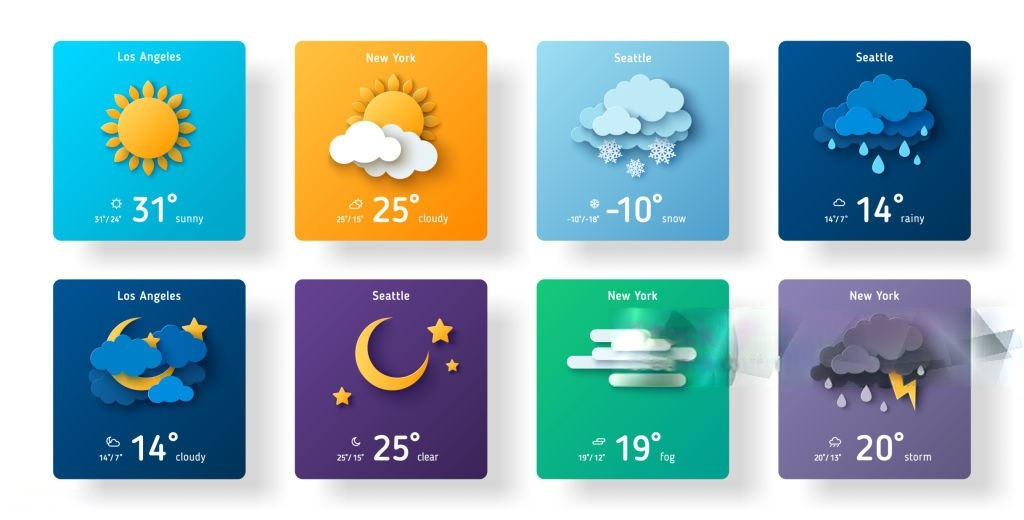

# Overview of the Project

The Project focuses on weather prediction using machine learning, with the primary goal of predicting the weather summary based on various meteorological parameters. The dataset using contains historical weather data from 2017 to 2024, including attributes such as temperature, humidity, wind speed, pressure, visibility, cloud cover, and precipitation type. The target variable, "Summary", represents the general weather condition (e.g., "Partly Cloudy", "Mostly Cloudy", "Rain", etc.).

#Objective of the Project

The objective of this project is to develop a machine learning model that can accurately classify the weather condition based on historical weather patterns. This involves exploring relationships between different weather features, handling missing data, feature engineering, and applying classification algorithms to predict the weather summary for future timestamps. The insights derived from this model can be valuable for meteorological forecasting, agriculture, disaster management, and other weather-dependent industries.

#Features :
THERE ARE 10 FEATURES AND 1 TARGET VARIABLE.

1) Formatted Date – The timestamp indicating when the weather data was recorded.

2)Precip Type-The type of precipitation observed, such as rain or snow.

3)Temperature (C) – The actual air temperature in degrees Celsius.

4)Apparent Temperature (C) – The perceived temperature considering wind and humidity.

5)Humidity – The relative humidity level as a fraction between 0 and 1.

6)Wind Speed (km/h) – The speed of the wind at the time of observation in kilometers per hour.

7)Wind Bearing (degrees) – The direction of the wind in degrees (0° is North, 90° is East, etc.).

8)Visibility (km) – The distance one can see clearly in kilometers.

9)Cloud Cover – The fraction of the sky covered by clouds (0 to 1).

10)Pressure (millibars) – The atmospheric pressure measured in millibars.

#Target Variable
Summary – A brief description of the weather conditions (e.g., "Partly Cloudy").

#Project code starts from here

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/Weather_History_2017-2024.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Cloud Cover               96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 8.1+ MB


In [4]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
data.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Cloud Cover,0


Changed the data into a dataframe

In [6]:
df=pd.DataFrame(data)

Find the mode value of "precip type" coloumn. Because the coloumn has categorical values

In [7]:
mode=df["Precip Type"].mode()[0]

Fill the mode value to the coloumn using "fillna" function




In [8]:
df["Precip Type"]=df["Precip Type"].fillna(mode)

Find is there any null values still present in the coloumn

In [9]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Cloud Cover,0


In [10]:
import seaborn as sns

<Axes: ylabel='Temperature (C)'>

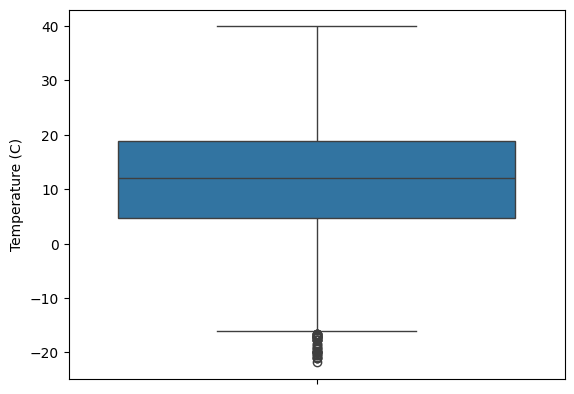

In [11]:
sns.boxplot(df["Temperature (C)"])

<Axes: ylabel='Apparent Temperature (C)'>

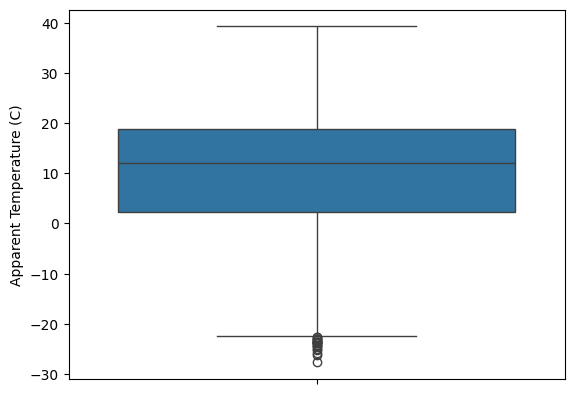

In [12]:
sns.boxplot(df["Apparent Temperature (C)"])

<Axes: ylabel='Humidity'>

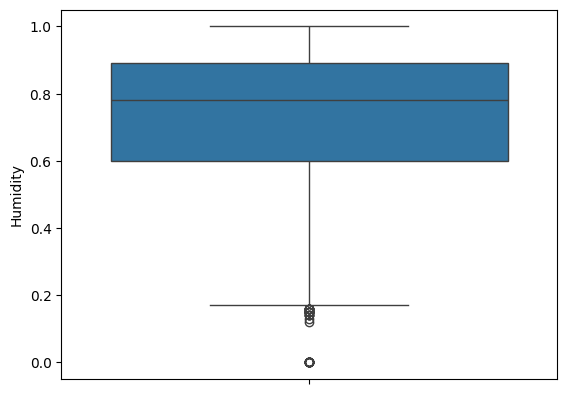

In [13]:
sns.boxplot(df["Humidity"])

<Axes: ylabel='Wind Speed (km/h)'>

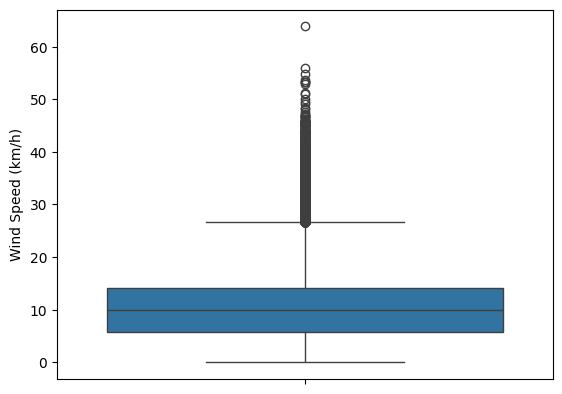

In [14]:
sns.boxplot(df["Wind Speed (km/h)"])

<Axes: ylabel='Wind Bearing (degrees)'>

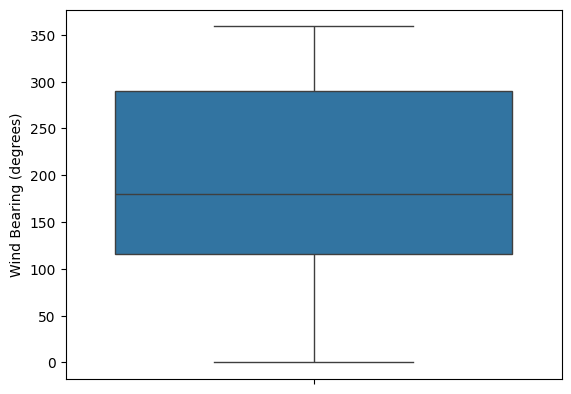

In [15]:
sns.boxplot(df["Wind Bearing (degrees)"])

<Axes: ylabel='Visibility (km)'>

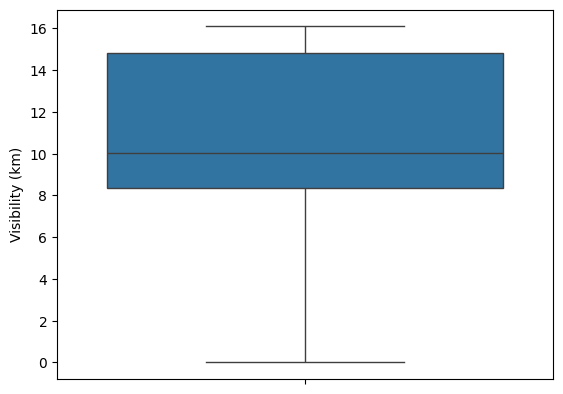

In [16]:
sns.boxplot(df["Visibility (km)"])

<Axes: ylabel='Pressure (millibars)'>

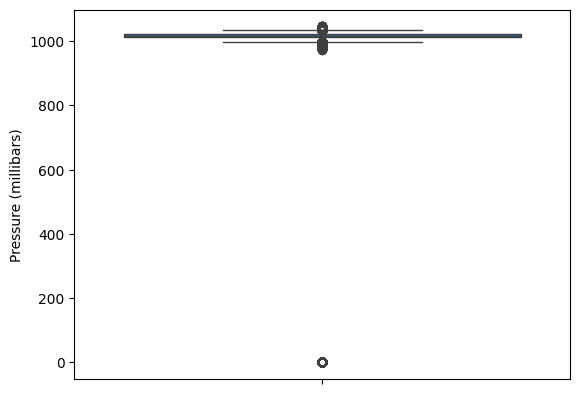

In [17]:
sns.boxplot(df["Pressure (millibars)"])

In [18]:
import numpy as np

# Compute IQR
Q1 = df["Wind Speed (km/h)"].quantile(0.25)
Q3 = df["Wind Speed (km/h)"].quantile(0.75)
IQR = Q3 - Q1

# Compute Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the Median
median_1 = df["Wind Speed (km/h)"].median()

# Replace ONLY Outliers, Keep Other Values Unchanged
df.loc[(df["Wind Speed (km/h)"] < lower_bound) | (df["Wind Speed (km/h)"] > upper_bound), "Wind Speed (km/h)"] = median_1




<Axes: ylabel='Wind Speed (km/h)'>

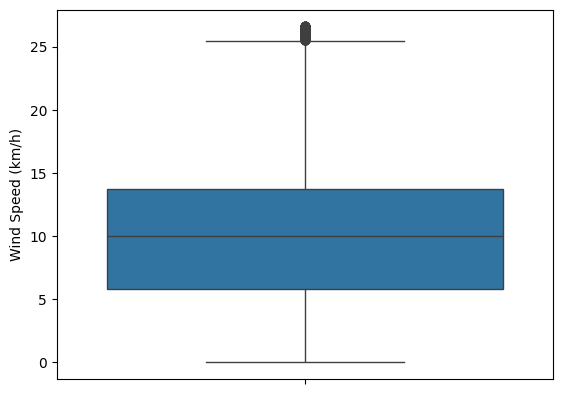

In [19]:
sns.boxplot(df["Wind Speed (km/h)"])

In [20]:
import numpy as np

# Compute IQR
Q1 = df["Pressure (millibars)"].quantile(0.25)
Q3 = df["Pressure (millibars)"].quantile(0.75)
IQR = Q3 - Q1

# Compute Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the Median
median = df["Pressure (millibars)"].median()

# Replace ONLY Outliers, Keep Other Values Unchanged
df.loc[(df["Pressure (millibars)"] < lower_bound) | (df["Pressure (millibars)"] > upper_bound), "Pressure (millibars)"] = median




<Axes: ylabel='Pressure (millibars)'>

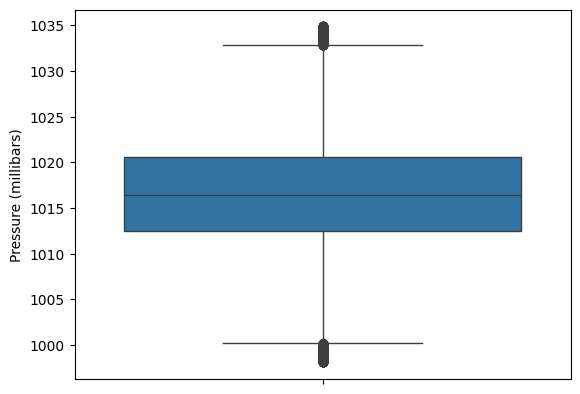

In [21]:
sns.boxplot(df["Pressure (millibars)"])

In [22]:
import numpy as np

# Compute IQR
Q1 = df["Humidity"].quantile(0.25)
Q3 = df["Humidity"].quantile(0.75)
IQR = Q3 - Q1

# Compute Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the Median
median_3 = df["Humidity"].median()

# Replace ONLY Outliers, Keep Other Values Unchanged
df.loc[(df["Humidity"] < lower_bound) | (df["Humidity"] > upper_bound), "Humidity"] = median_3




<Axes: ylabel='Humidity'>

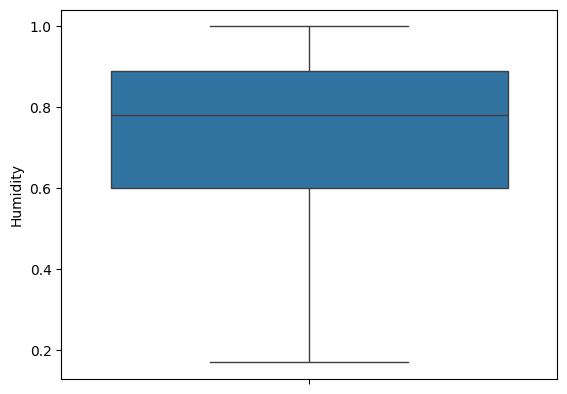

In [23]:
sns.boxplot(df["Humidity"])

In [24]:
import numpy as np

# Compute IQR
Q1 = df["Temperature (C)"].quantile(0.25)
Q3 = df["Temperature (C)"].quantile(0.75)
IQR = Q3 - Q1

# Compute Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the Median
median_4 = df["Temperature (C)"].median()

# Replace ONLY Outliers, Keep Other Values Unchanged
df.loc[(df["Temperature (C)"] < lower_bound) | (df["Temperature (C)"] > upper_bound), "Temperature (C)"] = median_4

<Axes: ylabel='Temperature (C)'>

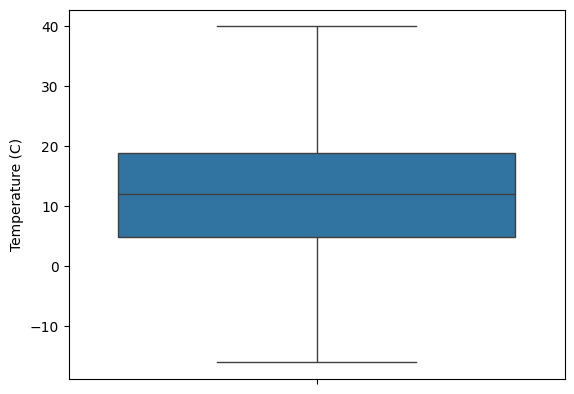

In [25]:
sns.boxplot(df["Temperature (C)"])

In [26]:
import pandas as pd

# Compute correlation
corr = df["Temperature (C)"].corr(df["Apparent Temperature (C)"])
print(f"Correlation: {corr}")


Correlation: 0.9905764547169948


Since temperature and apparent temperature are highly correlated. I remove apparent temperature. Because temperature is directly measured and apparent tempearature is measured from other features like wind speed and humidity etc which already exist in the data.

In [27]:
df=df.drop(["Apparent Temperature (C)","Cloud Cover"],axis=1)


<Axes: xlabel='Temperature (C)', ylabel='Count'>

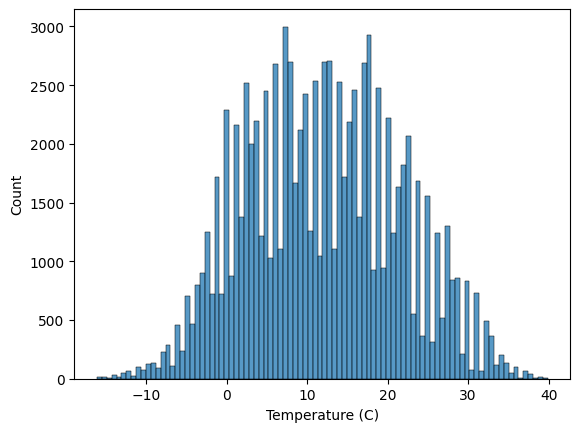

In [28]:
sns.histplot(df["Temperature (C)"])

<Axes: xlabel='Humidity', ylabel='Count'>

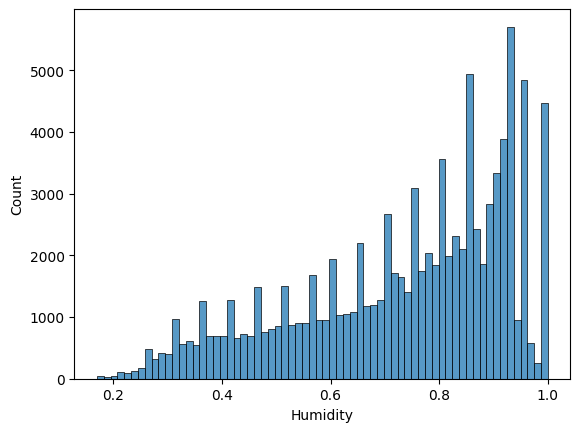

In [29]:
sns.histplot(df['Humidity'])

<Axes: xlabel='Wind Speed (km/h)', ylabel='Count'>

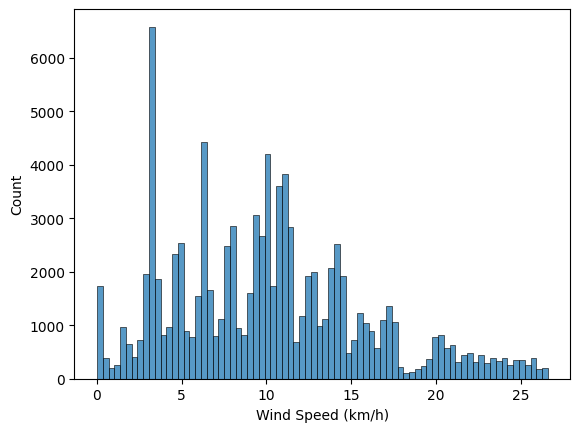

In [30]:
 sns.histplot(df['Wind Speed (km/h)'])

<Axes: xlabel='Pressure (millibars)', ylabel='Count'>

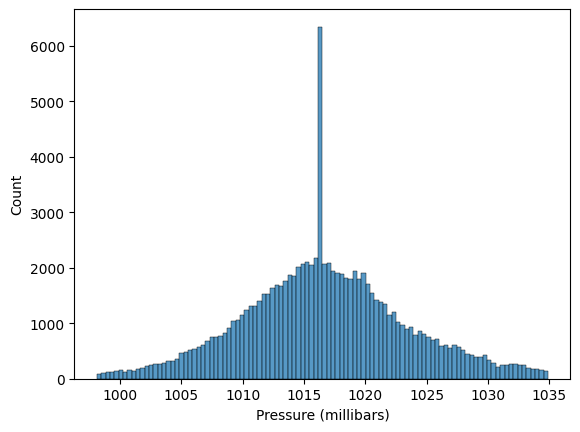

In [31]:
sns.histplot(df["Pressure (millibars)"])

Regarding skewness values.

1.If skewness value is equal to zero- Considering it as Normal distribution

2.if skewness greater than zero- considering it as positive skew or right skew

3. If skewness less than zero- considering it as negative skew or left skew

4. if skewness greater than 1 or -1 -- considering it as highly skewed and needs transformation

In [32]:
skewness_values=df['Temperature (C)'].skew()
print(skewness_values)

0.10559394346822255


Skewness value of Temperature suggests it is slightly right skewed which is considered as almost normal distribution. Hence no action needs to done to transform this column.

In [33]:
skewness_values_1=df["Pressure (millibars)"].skew()
print(skewness_values_1)

0.09881830364113063


Same with the case of Pressure also(Slightly right skewed). Hence no action needs to done to transform this column.

In [34]:
skewness_values_2=df["Humidity"].skew()
print(skewness_values_2)

-0.7079384799143202


In case of humidity, the value suggests it is a moderate left skewed. So needs transformation.

So square transformation is using for Humidity.

In [35]:
df["Humidity"] = np.square(df["Humidity"])  # Square transformation


In [36]:
skewness_values_4=df['Wind Speed (km/h)'].skew()
print(skewness_values_4)

0.5913268579086708


In case of Windspeed, the value suggests it is a moderate Right skewed. So needs transformation.

So uses squareroot transformation for wind speed

In [37]:
df['Wind Speed (km/h)'] = np.sqrt(df['Wind Speed (km/h)'])  # Square root transformation


In [38]:
import matplotlib.pyplot as plt

In [39]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

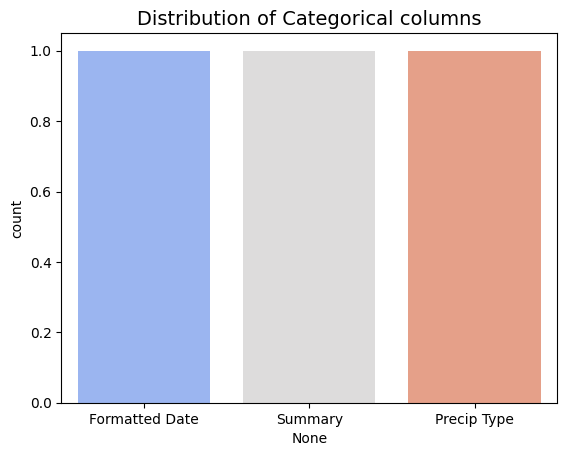

In [40]:
sns.countplot(x=categorical_cols,hue=categorical_cols,palette="coolwarm")
plt.title(f"Distribution of Categorical columns", fontsize=14)
plt.xlabel="Features"
plt.ylabel="Count"

In [41]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

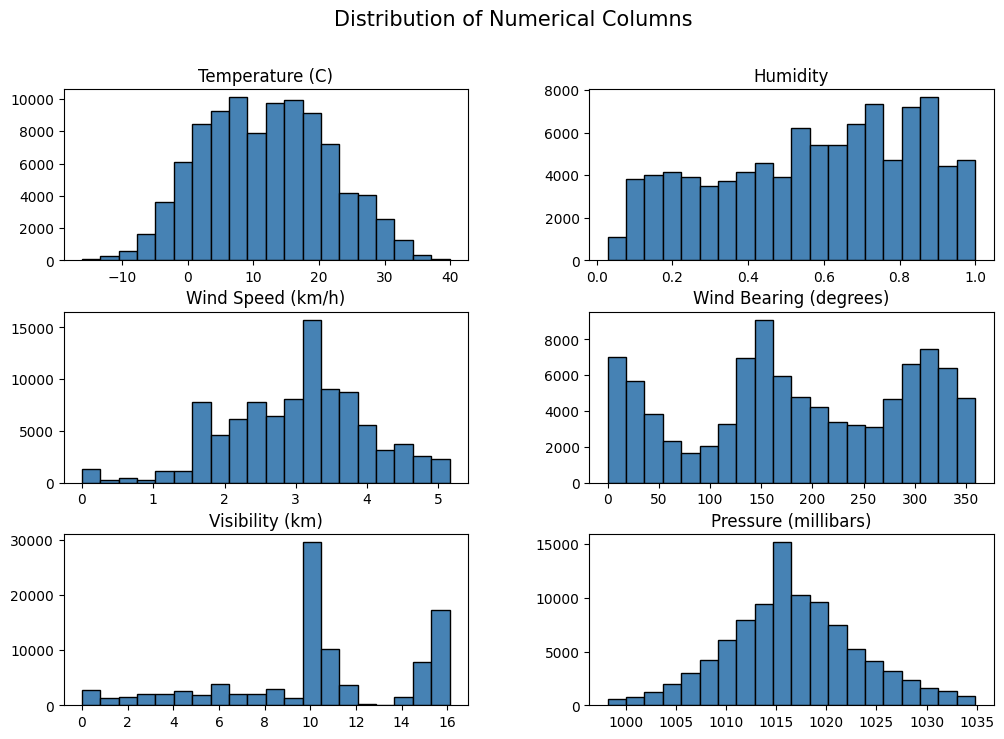

In [42]:
df[numerical_cols].hist(figsize=(12, 8), bins=20, grid=False, color="steelblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Columns", fontsize=15)
plt.show()

<ipython-input-43-38baae32d672>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Summary", y="Temperature (C)", data=df, palette="coolwarm")


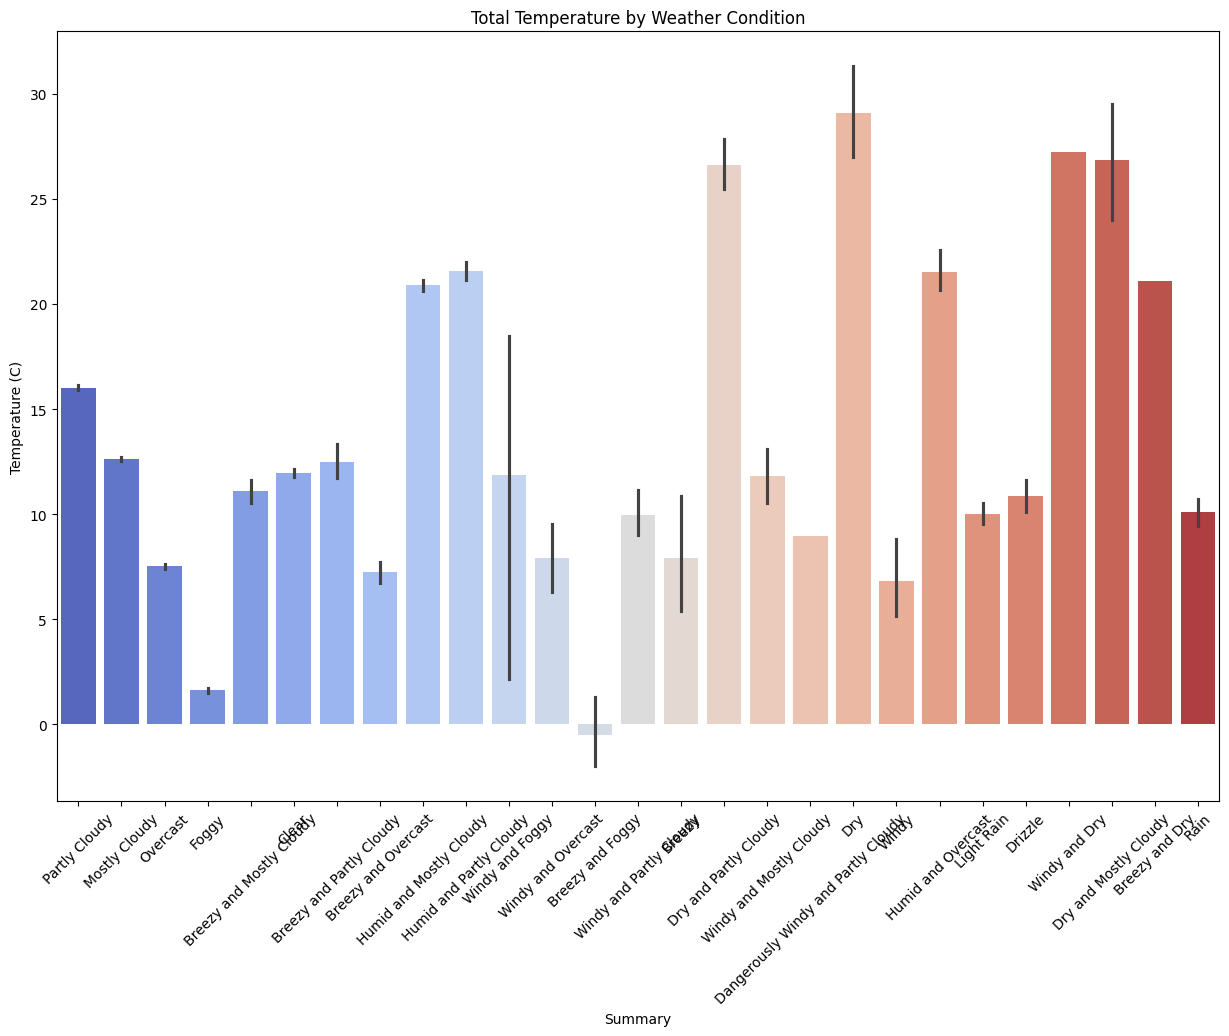

In [43]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Summary", y="Temperature (C)", data=df, palette="coolwarm")
plt.title("Total Temperature by Weather Condition")
plt.xticks(rotation=45)
plt.show()

<ipython-input-44-4e4c74eb35d9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Temperature (C)", y="Humidity", data=df, palette="coolwarm", size=5)


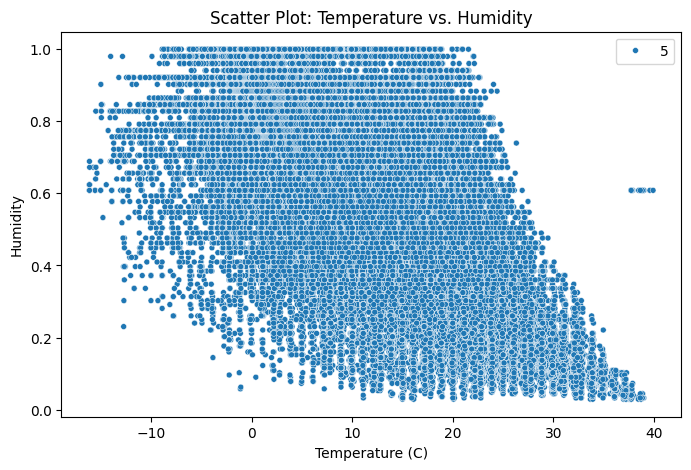

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Temperature (C)", y="Humidity", data=df, palette="coolwarm", size=5)
plt.title("Scatter Plot: Temperature vs. Humidity")
plt.show()


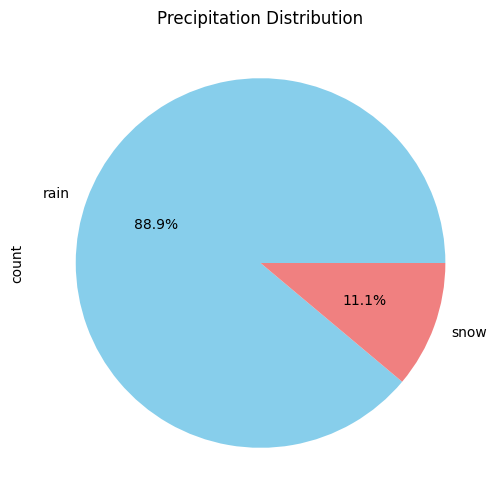

In [45]:
plt.figure(figsize=(6, 6))
df["Precip Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "lightcoral", "lightgreen"])
plt.title("Precipitation Distribution")
plt.show()

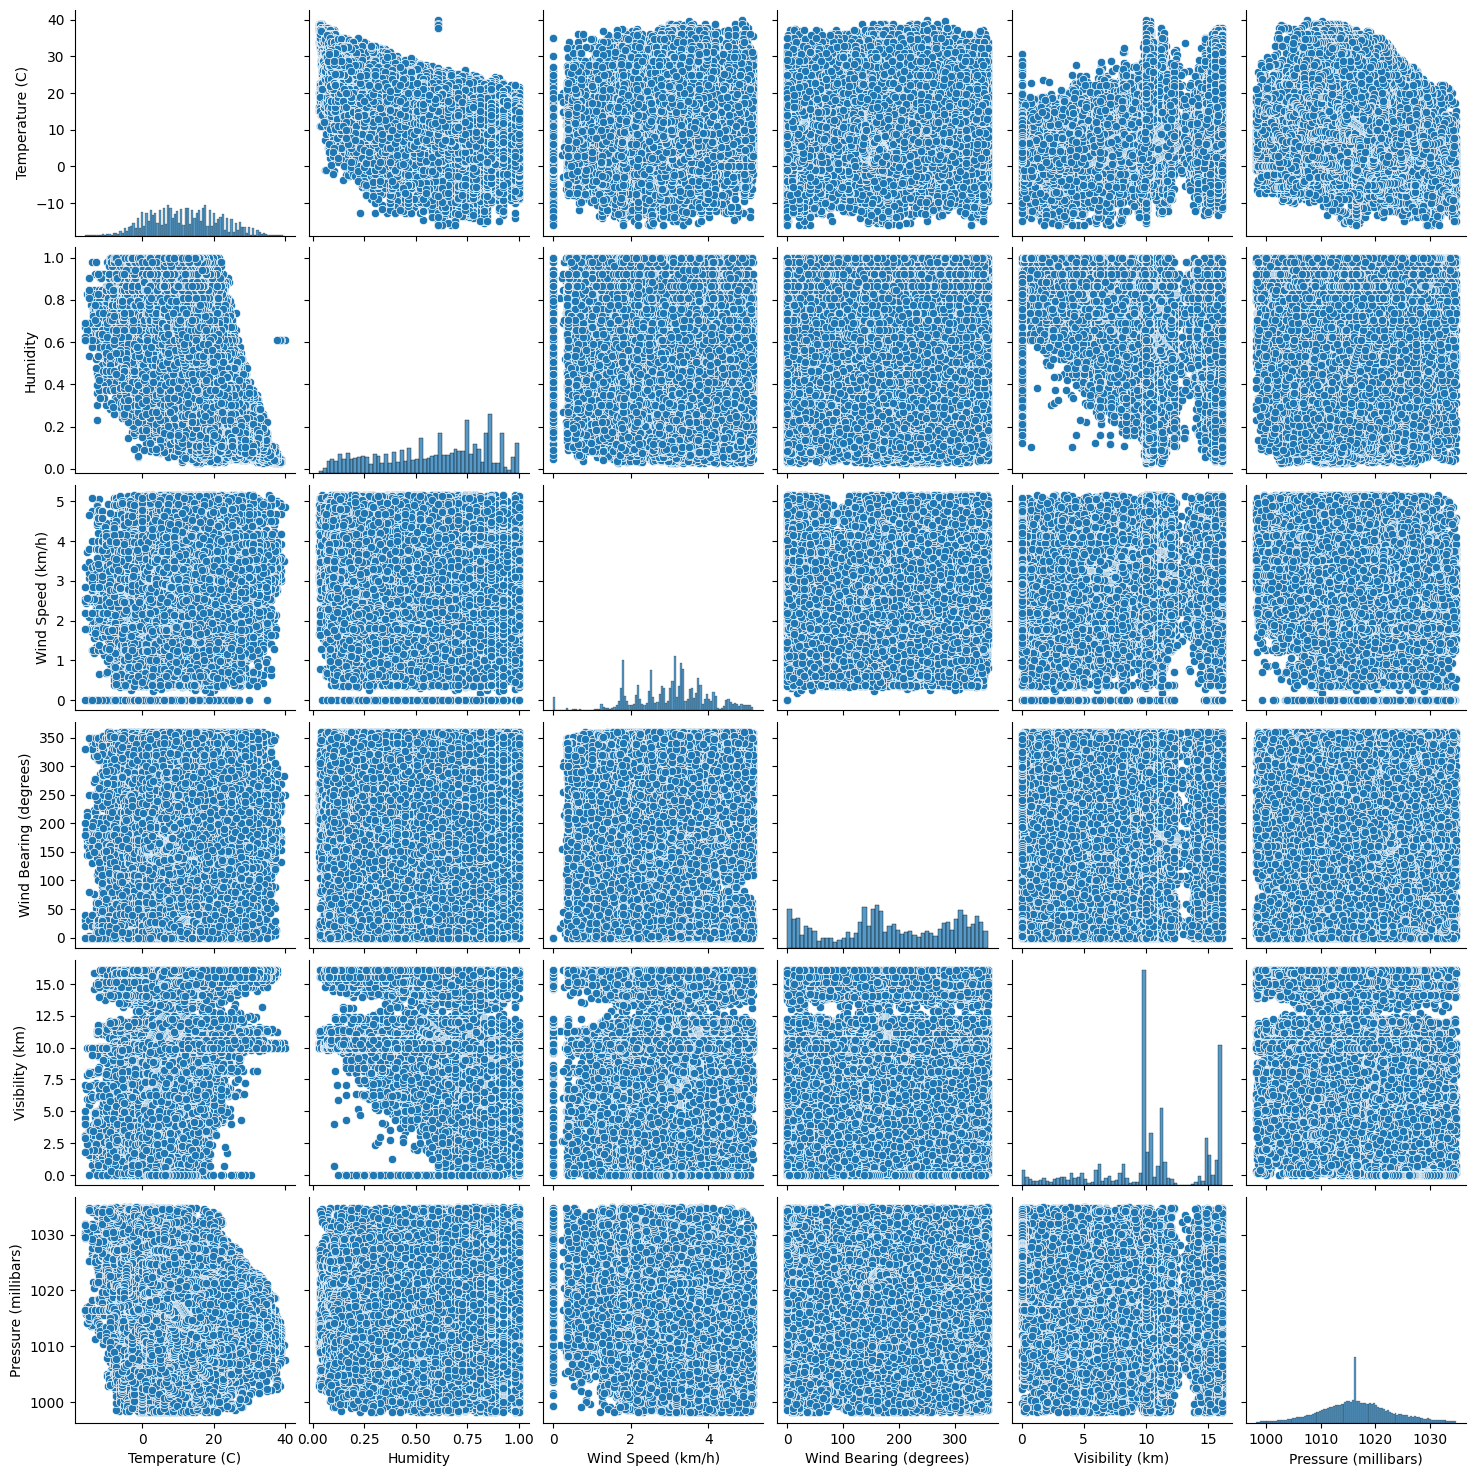

In [46]:
sns.pairplot(df)
plt.show()


<ipython-input-47-2dfed5c33a04>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], errors='coerce')


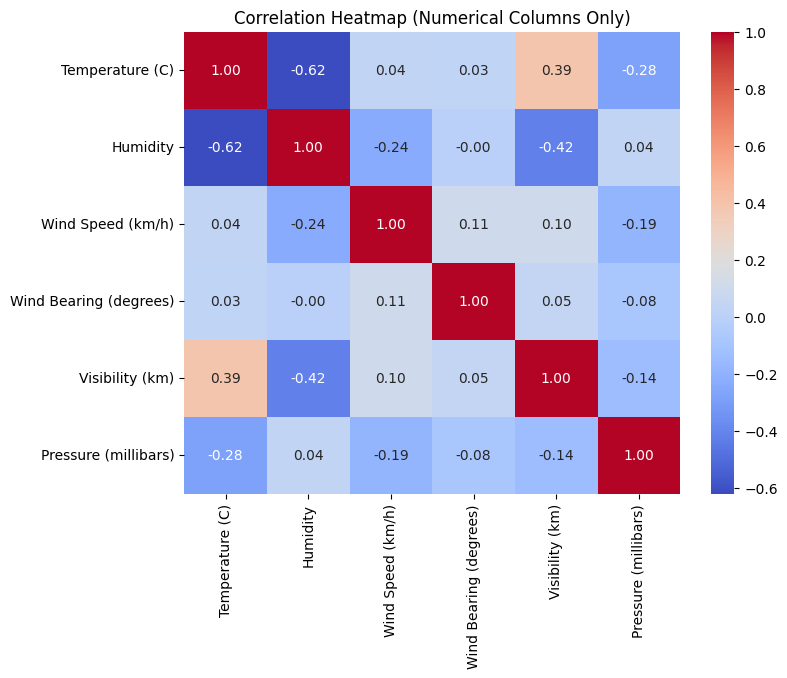

In [47]:

# Convert all non-numeric columns to datetime (if necessary)
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], errors='coerce')

# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns Only)")
plt.show()


<ipython-input-48-477e5ac696ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Humidity", y="Precip Type", data=df, palette="coolwarm")


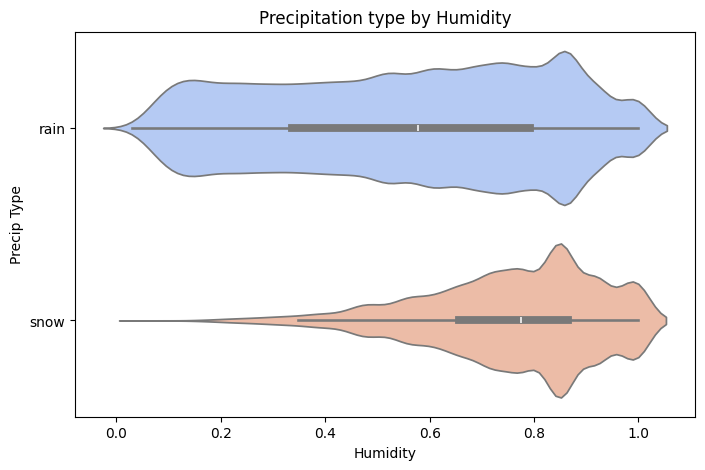

In [48]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Humidity", y="Precip Type", data=df, palette="coolwarm")
plt.title("Precipitation type by Humidity")
plt.show()


<Axes: ylabel='Temperature (C)'>

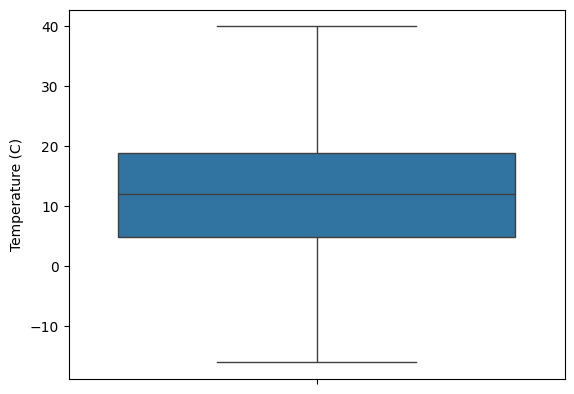

In [49]:
sns.boxplot(df["Temperature (C)"])

Feature encoding- 2 types-Label encoding and One hot encoding
Label encoding mainly used when target variables has discrete categories and it assigns a number to each category
One hot encoding is mainly used when target column has no natural order

In [50]:
# Feature Engineering: Encoding categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

label_encoders = {}
for col in ["Summary"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-Hot Encoding for 'Precip Type'
df = pd.get_dummies(df, columns=["Precip Type"], drop_first=True,dtype="int")

In [51]:
df

,Formatted Date,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_snow
0,2022-04-01 00:00:00+02:00,19,9.472222,0.7921,3.757619,251,15.8263,1015.13,0
1,2022-04-01 01:00:00+02:00,19,9.355556,0.7396,3.776851,259,15.8263,1015.63,0
2,2022-04-01 02:00:00+02:00,17,9.377778,0.7921,1.982019,204,14.9569,1015.94,0
3,2022-04-01 03:00:00+02:00,19,8.288889,0.6889,3.755476,269,15.8263,1016.41,0
4,2022-04-01 04:00:00+02:00,17,8.755556,0.6889,3.323342,259,15.8263,1016.51,0
...,...,...,...,...,...,...,...,...,...
96448,2024-09-09 19:00:00+02:00,19,26.016667,0.1849,3.316067,31,16.1000,1014.36,0
96449,2024-09-09 20:00:00+02:00,19,24.583333,0.2304,3.177216,20,15.5526,1015.16,0
96450,2024-09-09 21:00:00+02:00,19,22.038889,0.3136,2.997299,30,16.1000,1015.66,0
96451,2024-09-09 22:00:00+02:00,19,21.522222,0.3600,3.244904,20,16.1000,1015.95,0


Converting date into numerical features like year,month,day,hour etc

In [52]:
# Convert 'Formatted Date' to datetime format
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)

# Extract useful date components
df["Year"] = df["Formatted Date"].dt.year
df["Month"] = df["Formatted Date"].dt.month
df["Day"] = df["Formatted Date"].dt.day
df["Hour"] = df["Formatted Date"].dt.hour

# Drop the original datetime column
df.drop(columns=["Formatted Date"], inplace=True)

In following codes,  
1)I had done removing constant features since it has zero variance and making it useless for model training

2)Check for missing values and handle them since selectkbest compute statistics for feature selection,it encounters NaN or infinite values

3)Standardizing features before selection if some features have extremely large/small values and normalize them.

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


# 1️⃣ Remove constant features and make a copy to avoid SettingWithCopyWarning
df = df.loc[:, df.nunique() > 1].copy()

# 2️⃣ Handle missing values safely
df.fillna(df.median(), inplace=True)

# 3️⃣ Scale numerical features and convert back to DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Summary"]))  # Exclude target variable

# Convert scaled data back to DataFrame and retain column names
X_scaled = pd.DataFrame(X_scaled, columns=df.drop(columns=["Summary"]).columns)

# 4️⃣ Run Feature Selection
X = X_scaled
y = df["Summary"]  # Target variable (ensure it's encoded if categorical)

selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X_scaled.columns[selector.get_support()]
print("Selected Features:", selected_features)



Selected Features: Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)',
       'Precip Type_snow'],
      dtype='object')


#Feature Selection

In [54]:
# Feature Selection using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

#Split Data into Training and Testing Sets

In [55]:
from sklearn.model_selection import train_test_split

# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Alternatively, Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Display results
selected_features, feature_importances

(Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)',
        'Precip Type_snow'],
       dtype='object'),
 Visibility (km)           0.174684
 Temperature (C)           0.124706
 Pressure (millibars)      0.117667
 Humidity                  0.108151
 Wind Speed (km/h)         0.102858
 Wind Bearing (degrees)    0.097094
 Day                       0.087006
 Hour                      0.072402
 Month                     0.054787
 Year                      0.054771
 Precip Type_snow          0.005875
 dtype: float64)

Classification algorithms are using since we are predicting summary which is categorical and is discrete.

#1.Logistic Regression

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression
log_reg = LogisticRegression(solver='saga', max_iter=500)
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression trained successfully ")




Logistic Regression trained successfully 


#Logistic Regression Peformance

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.4908
Precision: 0.4599
Recall: 0.4908
F1-Score: 0.4592


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#2. Support Vector model

In [58]:
from sklearn.svm import SVC
models_classification = {"SVM": SVC()}
for name, model in models_classification.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully ✅")

SVM trained successfully ✅


# SVM Performance

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

for name, model in models_classification.items():
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


🔹 SVM Performance:
Accuracy: 0.5489606552278264
Precision: 0.5457616524966477
Recall: 0.5489606552278264
F1-Score: 0.5250655235409382


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#3.Decision Tree classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
models_classification = {"Decision Tree": DecisionTreeClassifier()}
for name, model in models_classification.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully ✅")

Decision Tree trained successfully ✅


#Decision Tree Performance

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

for name, model in models_classification.items():
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


🔹 Decision Tree Performance:
Accuracy: 0.5443989425120522
Precision: 0.5450782019332567
Recall: 0.5443989425120522
F1-Score: 0.5446293368372144


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#4.K Neighbors Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
models_classification = {"KNN": KNeighborsClassifier()}
for name, model in models_classification.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully ✅")

KNN trained successfully ✅


#KNN Performance

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

for name, model in models_classification.items():
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


🔹 KNN Performance:
Accuracy: 0.616038567207506
Precision: 0.6180558635247279
Recall: 0.616038567207506
F1-Score: 0.6158522982169503


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#5.Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
models_classification = {"Naïve Bayes": GaussianNB()}
for name, model in models_classification.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully ")

Naïve Bayes trained successfully 


#Naive Bayes Peformance

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

for name, model in models_classification.items():
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))




🔹 Naïve Bayes Performance:
Accuracy: 0.2098906225701104
Precision: 0.4257364127883408
Recall: 0.2098906225701104
F1-Score: 0.26185963755243435


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Based on the performance metrics for all models, K-Nearest Neighbors (KNN) is the best model.
Insights of performance values
1)KNN has the highest accuracy (61.4%) compared to other models.

2)KNN also has the highest Precision (61.6%), Recall (61.4%), and F1-score (61.4%).

3)Decision Tree is slightly behind KNN, but KNN still performs better overall.

4)Naïve Bayes performs the worst, with an accuracy of only 20 %.

5)Logistic Regression also performs poorly (49% accuracy), indicating that it is not suitable for this dataset.

6)SVM performs better than Logistic Regression but is not as good as KNN or Decision Tree

In [66]:
df.to_csv("final_updated_weather_dataset.csv", index=False)

In [67]:
df=pd.read_csv("/content/final_updated_weather_dataset.csv")

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Define target variable (change 'rating' to your actual target column)
target_column = "Summary"
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Split dataset into 80% training/testing & 20% unseen data
X_train_test, X_unseen, y_train_test, y_unseen = train_test_split(X, y, test_size=0.2, random_state=42)

# Save unseen data to a new CSV file
unseen_data = pd.concat([X_unseen, y_unseen], axis=1)
unseen_data.to_csv("unseen_data_new.csv", index=False)

print("✅ Unseen data saved as 'unseen_data.csv'")

✅ Unseen data saved as 'unseen_data.csv'


#Why KNN is the Best Model?
1)Best Overall Metrics: Highest accuracy, precision, recall, and F1-score.

2)Handles Non-Linearity: KNN is a non-parametric algorithm that works well when the decision boundary is complex.

3)Less Overfitting

#Hyper parameter tuning

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Try different values of k
    'weights': ['uniform', 'distance'],  # Uniform vs. Distance-based weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Initialize KNN model
knn = KNeighborsClassifier()

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train final model with best parameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Evaluate tuned model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Tuned KNN Accuracy: {accuracy:.4f}")
print(f"Tuned KNN Precision: {precision:.4f}")
print(f"Tuned KNN Recall: {recall:.4f}")
print(f"Tuned KNN F1-Score: {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy: 0.6661050121267008
Tuned KNN Accuracy: 0.6857
Tuned KNN Precision: 0.6852
Tuned KNN Recall: 0.6857
Tuned KNN F1-Score: 0.6852


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 📊 **Model Performance Summary**

| Model                  | Accuracy  | Precision | Recall  | F1-Score |
|------------------------|-----------|------------|----------|-----------|
| Logistic Regression    | 0.4908    | 0.4599     | 0.4908   | 0.4592    |
| SVM                   | 0.5489    | 0.5457     | 0.5489   | 0.5250    |
| Decision Tree         | 0.5443    | 0.5450     | 0.5443   | 0.5446    |
| K-Nearest Neighbors   | 0.6160    | 0.6180     | 0.6160   | 0.6158    |
| Naïve Bayes          | 0.2098    | 0.4257     | 0.2098   | 0.2618    |

## 🔹 Best Model: **K-Nearest Neighbors (KNN)**
- **Highest Accuracy (61.6%)**
- **Best F1-score (61.58%)**
- **Good Precision and Recall balance**
- **SVM and Decision Tree also performed well**


#**Limitations of the Dataset**

**High-Class Imbalance:**

If certain weather summaries occur more frequently, the model might be biased toward them.

**Feature Correlation Issues:**

Weather features are often correlated (e.g., humidity and temperature).
Some models (like Naïve Bayes) assume independence, leading to poor performance.

**Data Quality & Missing Values:**

If the dataset contains missing or noisy values, it can impact model performance.
Data imputation or outlier handling may improve accuracy.




#**Conclusion**

**Simple Models Struggled:**

Logistic Regression had moderate performance, meaning the data might have complex patterns that linear models can't capture.
Naïve Bayes performed poorly, likely due to correlated features (weather data typically has dependencies between temperature, humidity, and pressure).

**Non-Linear Models Performed Better:**

KNN, Decision Tree, and SVM, which capture complex relationships, showed better performance.
KNN achieved the highest accuracy, meaning it benefits from patterns in the dataset.



#**Best Model**

**Best Model**: The K neighbors(**KNN**) model, with an accuracy of **0.68**(After hyper parameter tuning), has been saved as **best_knn_model.joblib** for future use.

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump
import pandas as pd


# Load the training data
X_train_processed = pd.read_csv("final_updated_weather_dataset.csv")

# Define features and labels to train on.
selected_features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Precip Type_snow']
X_train = X_train_processed[selected_features]
y_train = X_train_processed['Precip Type_snow']


# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Save the trained KNN model using joblib
dump(knn, "best_knn_model.joblib")

print("Model saved successfully!")

Model saved successfully!


In [80]:
import pandas as pd
from joblib import load

# 🔹 1️⃣ Load Preprocessed Training Data
X_train_processed = pd.read_csv("final_updated_weather_dataset.csv")

# 🔹 2️⃣ Load Unseen Data
X_new = pd.read_csv("/content/unseen_data_new.csv")

# 🔹 3️⃣ Ensure Columns Match Training Data
X_new = X_new.reindex(columns=X_train_processed.columns, fill_value=0)  # Fills missing columns with 0

# 🔹 4️⃣ Select Only Required Features (Ensure Order Matches Training)
selected_features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Precip Type_snow']
X_new_selected = X_new[selected_features]  # Keep only selected features

# 🔹 5️⃣ Load Trained KNN Model
knn_model = load("best_knn_model.joblib")

# 🔹 6️⃣ Make Predictions
y_pred = knn_model.predict(X_new_selected)

print("Predicted Class:", y_pred)


Predicted Class: [0 0 0 ... 0 0 0]


#🚀 **Final Conclusion**

KNN is the best performing model for this dataset.

SVM & Decision Tree are also strong contenders.

Data issues like class imbalance & feature correlation could be affecting accuracy.

Further improvements can be made with hyperparameter tuning & advanced models.